In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [14]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### Loading in datasets

In [15]:
usage_by_state = pd.read_csv('CSV/usage_by_state.csv')
usage_by_state.set_index('state', inplace=True)

workers = pd.read_csv('CSV/business_char_workers_us.csv')
worker_impact = pd.read_csv('CSV/worker_impact.csv')
worker_impact.set_index('tech_usage_worker_impact', inplace=True)

revenues_disclosed = pd.read_csv('CSV/revenues_disclosed.csv')
revenues_hidden = pd.read_csv('CSV/revenues_hidden.csv')
revenue_state = pd.read_csv('CSV/revenue_states.csv')
revenue_industry = pd.read_csv('CSV/revenue_industry.csv')
remove_outlier = pd.read_csv('CSV/remove_white.csv')

owner_age_gender = pd.read_csv('CSV/owner_age_gender.csv')

#### Business Characteristics

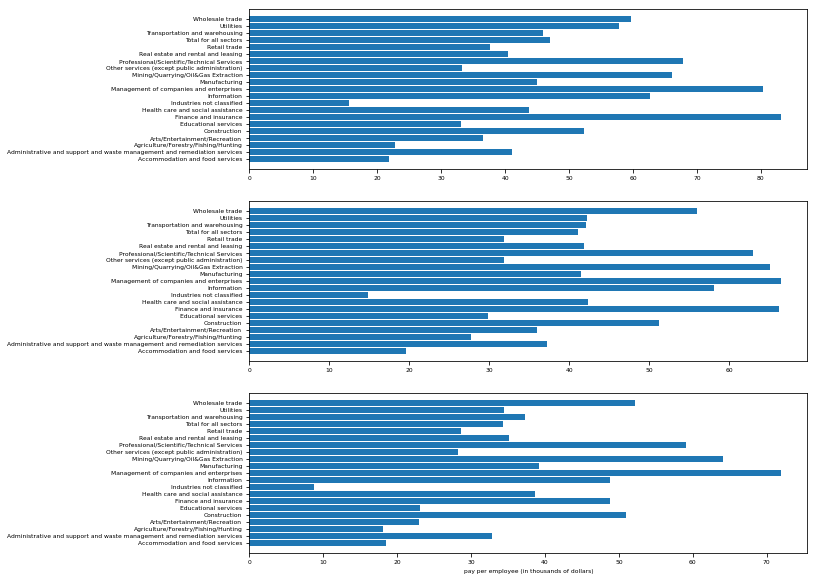

In [16]:
#filtering

#optional race filtering 
# races = ['Asian', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
# workers = workers[workers.race.isin(races)]

employment = ['Contractors/subcontractors/independent contractors/outside consultants', 'Full-time paid employees', 'Part-time paid employees']
workers = workers[workers.buschar_label.isin(employment)]

workers['annual_payroll'] = workers['annual_payroll'].astype(np.int64, errors='ignore')
workers['number_of_employees'] = workers['number_of_employees'].astype(np.int64, errors='ignore')

#create a new column which shows the average pay per employee
workers['pay_per_employee'] = round(workers['annual_payroll'] / workers['number_of_employees'])

#perform an aggregtion
workers = workers.groupby(['industry', 'buschar_label']).agg(pay_per_employee=('pay_per_employee', 'mean')).unstack()

#change how the column labels are presented (tuples to string)
workers.columns = [':'.join(x) if x[1] else x[0] for x in workers.columns] 

#uncomment this line if race filtering is enabled
# workers.index = [':'.join(x) if x[1] else x[0] for x in workers.index] 

#impute nulls with row average
workers = workers.T.fillna(workers.mean(axis=1)).T

#drop empty rows
workers.dropna(inplace=True)

plt.rcParams.update({'font.size': 6})

fig, ax = plt.subplots(3, 1, figsize=(10,10))

# some trickiness to add xlabels by wrapping subplots in a larger grid
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("pay per employee (in thousands of dollars)")


ax[0].barh(workers.index, workers['pay_per_employee:Contractors/subcontractors/independent contractors/outside consultants'])
ax[1].barh(workers.index, workers['pay_per_employee:Full-time paid employees'])
ax[2].barh(workers.index, workers['pay_per_employee:Part-time paid employees'])
plt.show()

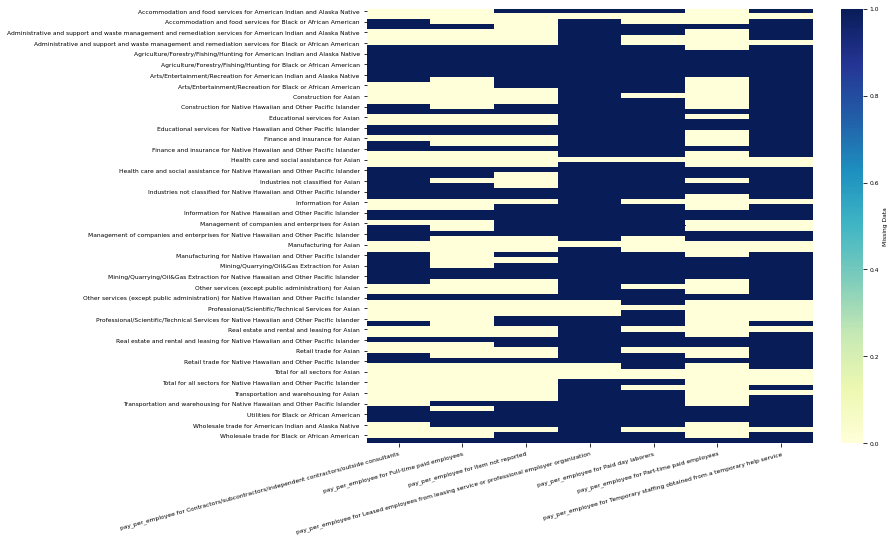

In [17]:
#read in the df
workers = pd.read_csv('CSV/business_char_workers_us.csv')

# #filtering

#optional race filtering 
races = ['Asian', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
workers = workers[workers.race.isin(races)]

employment = ['All firms', 'Total reporting', 'Items not reported', 'None of the above']
workers = workers[~workers.buschar_label.isin(employment)]

workers['annual_payroll'] = workers['annual_payroll'].astype(np.int64, errors='ignore')
workers['number_of_employees'] = workers['number_of_employees'].astype(np.int64, errors='ignore')

#create a new column which shows the average pay per employee
workers['pay_per_employee'] = round(workers['annual_payroll'] / workers['number_of_employees'])

#perform an aggregtion
workers = workers.groupby(['industry', 'race', 'buschar_label']).agg(pay_per_employee=('pay_per_employee', 'mean')).unstack()

#change how the column labels are presented (tuples to string)
workers.columns = [' for '.join(x) if x[1] else x[0] for x in workers.columns] 

#run this line if race filtering is enabled
workers.index = [' for '.join(x) if x[1] else x[0] for x in workers.index] 

plt.figure(figsize=(10,8))
sns.heatmap(workers.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_Worker_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=15, ha='right', rotation_mode='anchor');

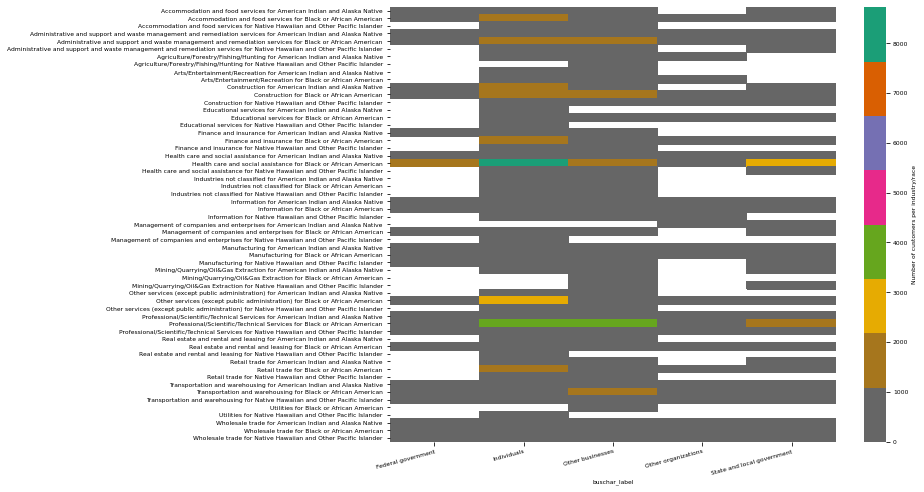

In [18]:
#read in from csv
customers = pd.read_csv('CSV/business_char_customers_us.csv')

#filtering

#race filtering is optional
races = ['Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
customers = customers[customers.race.isin(races)]

buyers = ['Individuals', 'Other businesses', 'State and local government', 'Other organizations', 'Federal government']
customers = customers[customers.buschar_label.isin(buyers)]

filtered_industries = ["Total for all sectors"]
customers = customers[~customers["industry"].isin(filtered_industries)]

#perform an aggregation
customers = customers.groupby(['industry', 'race', 'buschar_label'])['number_of_firms'].sum().unstack()

# uncomment this line if race filtering is enabled
customers.index = [' for '.join(x) if x[1] else x[0] for x in customers.index] 

#for changing the size of the text
plt.rcParams.update({'font.size': 6})

plt.figure(figsize=(10,8))
sns.heatmap(customers,
            cmap="Dark2_r",
            cbar_kws={'label': 'Number of customers per industry/race'})
plt.savefig("visualizing_Customer_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=15, ha='right', rotation_mode='anchor');

### Revenue
#### Topics:
 1. Revenue by Race
 2. Revenue by State and Race
 3. Companies that Chose Not to Disclose Revenues
 4. Revenue by Industry and Race

#### Revenue by Race

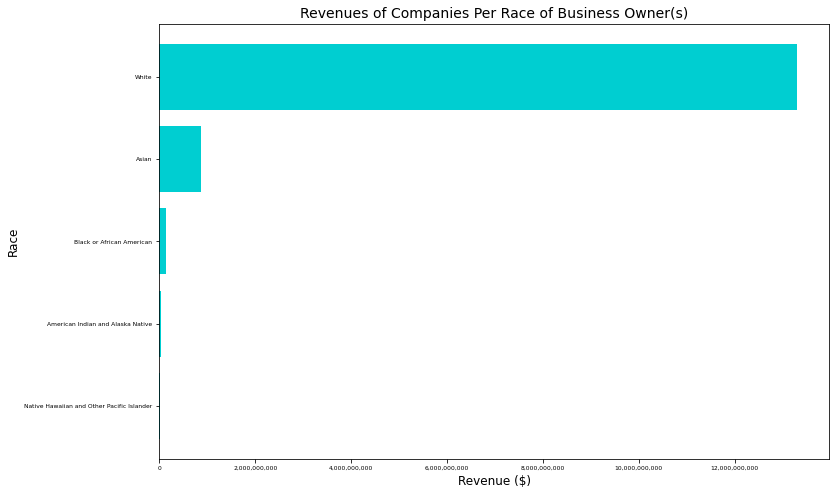

In [19]:
# sort values in df by revenue, descending order
revenues_disclosed = revenues_disclosed.sort_values('revenue')

plt.figure(figsize= (12,8))
y = revenues_disclosed['race']
x = revenues_disclosed['revenue']
ax = plt.barh(y, x, color = 'darkturquoise')
#change x-axis from log to numeric
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Revenues of Companies Per Race of Business Owner(s)', size = 14)
plt.xlabel('Revenue ($)', size = 12)
plt.ylabel('Race', size = 12);

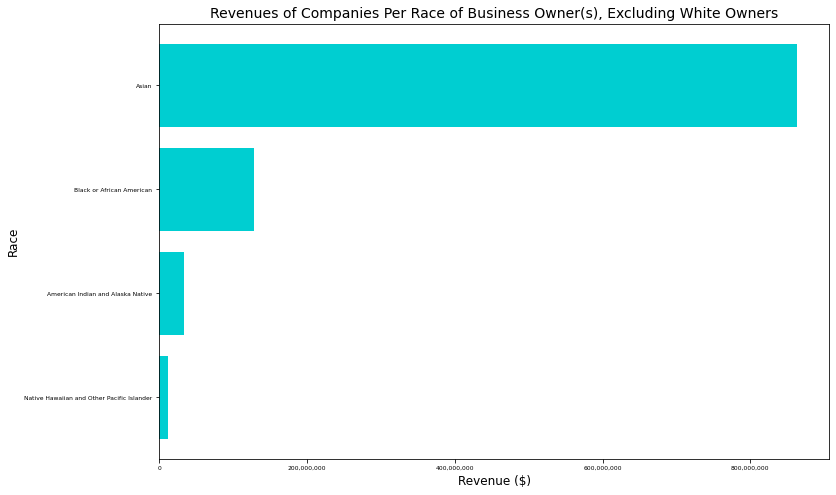

In [20]:
# sort values in df by revenue, descending order
remove_outlier = remove_outlier.sort_values('revenue')

plt.figure(figsize= (12,8))
y = remove_outlier['race']
x = remove_outlier['revenue']
plt.barh(y, x, color = 'darkturquoise')
#change x-axis from log to numeric
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Revenues of Companies Per Race of Business Owner(s), Excluding White Owners', size = 14)
plt.xlabel('Revenue ($)', size = 12)
plt.ylabel('Race', size = 12);

#### Companies that Chose Not to Disclose Revenues

During initial data analysis, we discovered that not every company had disclosed their exact revenue generated. Instead, some companies had opted to disclose a range that their company revenues fell within: These ranges are:

    1: Less than $1 million
    2: $1 million to less than $5 million
    3: $5 million to less than $15 million
    4: $15 million to less than $50 million
    5: $50 million to less than $75 million
    6: $75 million to less than $150 million
    7: $150 million to less than $500 million
    8: $500 million to less than $1 billion
    9: $1 billion to less than $5 billion
    10: $5 billion or more

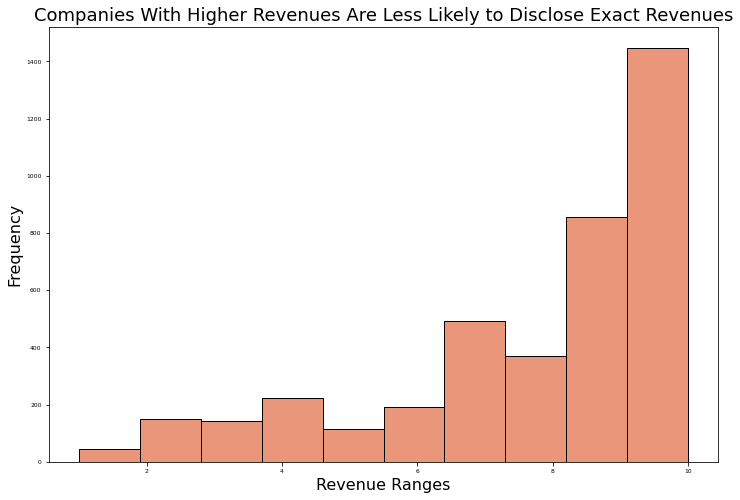

In [21]:
#replace revenue range letters with numbers for numeric scale
revenues_hidden['revenue_ranges'] = revenues_hidden['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.figure(figsize= (12,8))
plt.hist(revenues_hidden['revenue_ranges'], color = 'darksalmon', bins = 10, ec = 'black')
plt.title('Companies With Higher Revenues Are Less Likely to Disclose Exact Revenues', size=18)
plt.xlabel('Revenue Ranges', size=16)
plt.ylabel('Frequency', size=16);

#### Revenue by State and Race

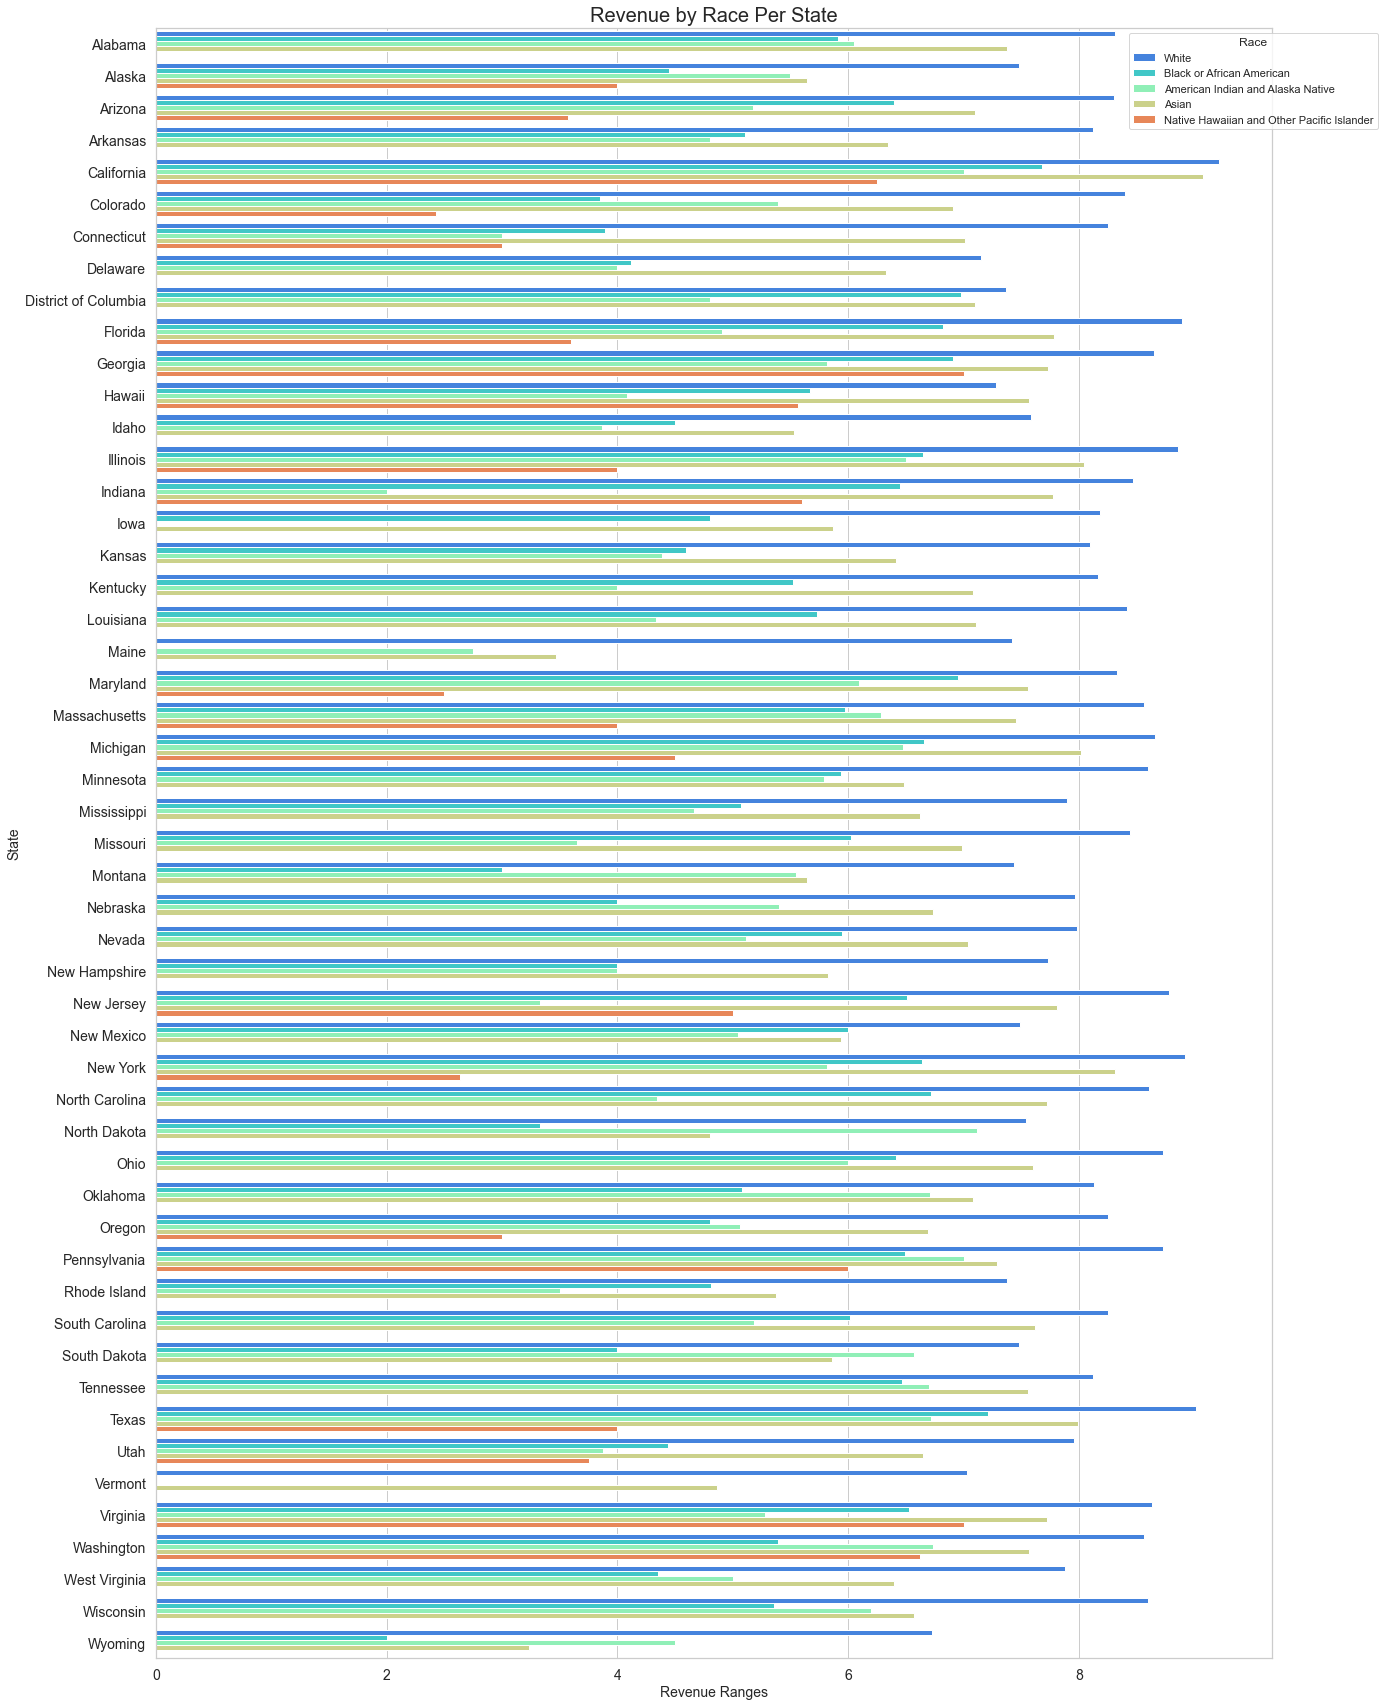

In [22]:
#replace revenue range letters with numbers for numeric scale
revenue_state['revenue_ranges'] = revenue_state['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#sort state names by alphabetical order
revenue_state = revenue_state.sort_values('name')

sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,30))
ax = sns.barplot(x='revenue_ranges', 
                 y='name',
                 data=revenue_state, 
                 palette='rainbow', 
                 hue='race',
                 ci=None)
plt.legend(bbox_to_anchor=(1.1, 1),loc='upper right', title='Race')
ax.set_title('Revenue by Race Per State', size=20)
ax.set_xlabel('Revenue Ranges', size=14)
ax.set_ylabel('State', size=14)
plt.yticks(size = 14)
plt.xticks(size = 14);

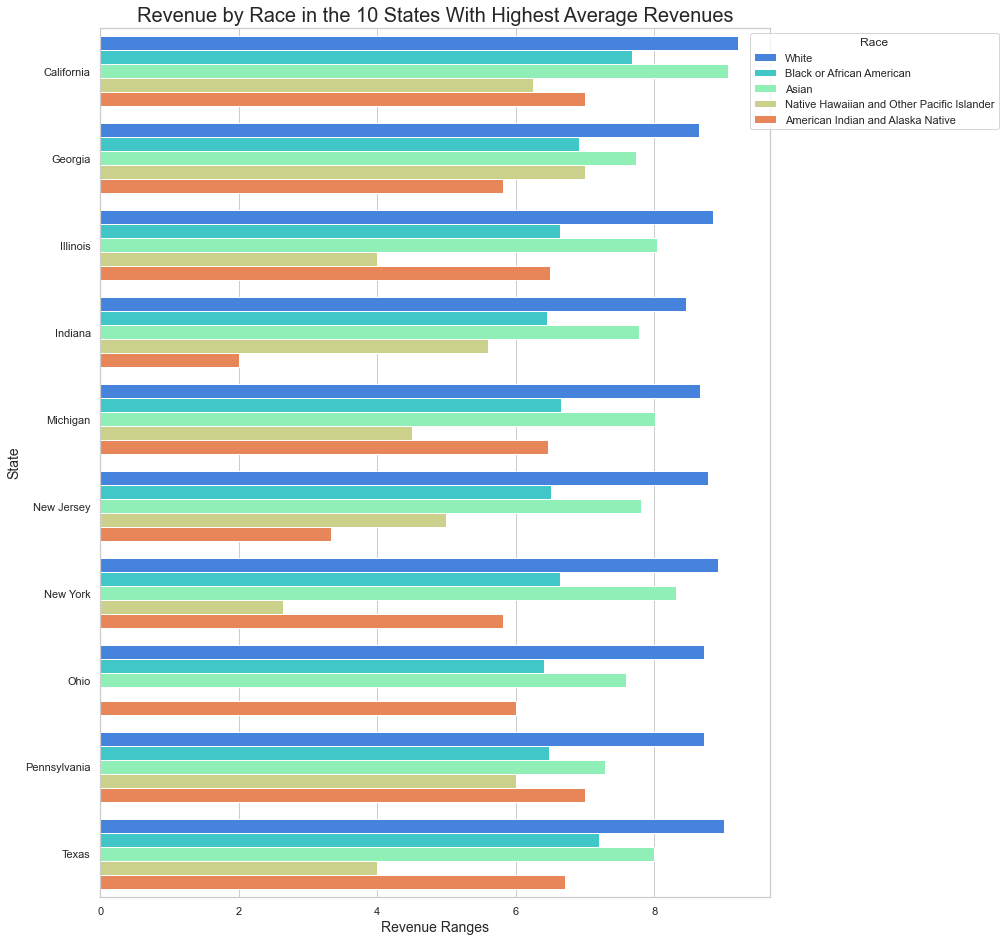

In [23]:
# filter out unnecessary columns and do group by to get average state revenues total
sorted_states = revenue_state[['state','name', 'revenue_ranges']]
sorted_states['revenue_ranges'].value_counts()
sorted_states = sorted_states.groupby(['state','name'])['revenue_ranges'].mean().sort_values(ascending=False)
# take states with top 10 revenues
top = sorted_states.iloc[:10]
#store names of state in list
top10 = ['California', 'Texas', 'New York', 'Illinois', 'Ohio', 'Michigan', 'New Jersey', 'Pennsylvania', 'Indiana', 'Georgia']
#create dataframe with only the states that are in top10 (this dataframe includes race)
top10states = revenue_state[revenue_state.name.isin(top10)]

sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,16))
ax = sns.barplot(x='revenue_ranges', 
                 y='name',
                 data=top10states, 
                 palette='rainbow', 
                 hue='race',
                 ci=None)
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right', title='Race')

ax.set_title('Revenue by Race in the 10 States With Highest Average Revenues', size=20)
ax.set_xlabel('Revenue Ranges', size=14)
ax.set_ylabel('State', size=14);

#### Revenue by Industry and Race

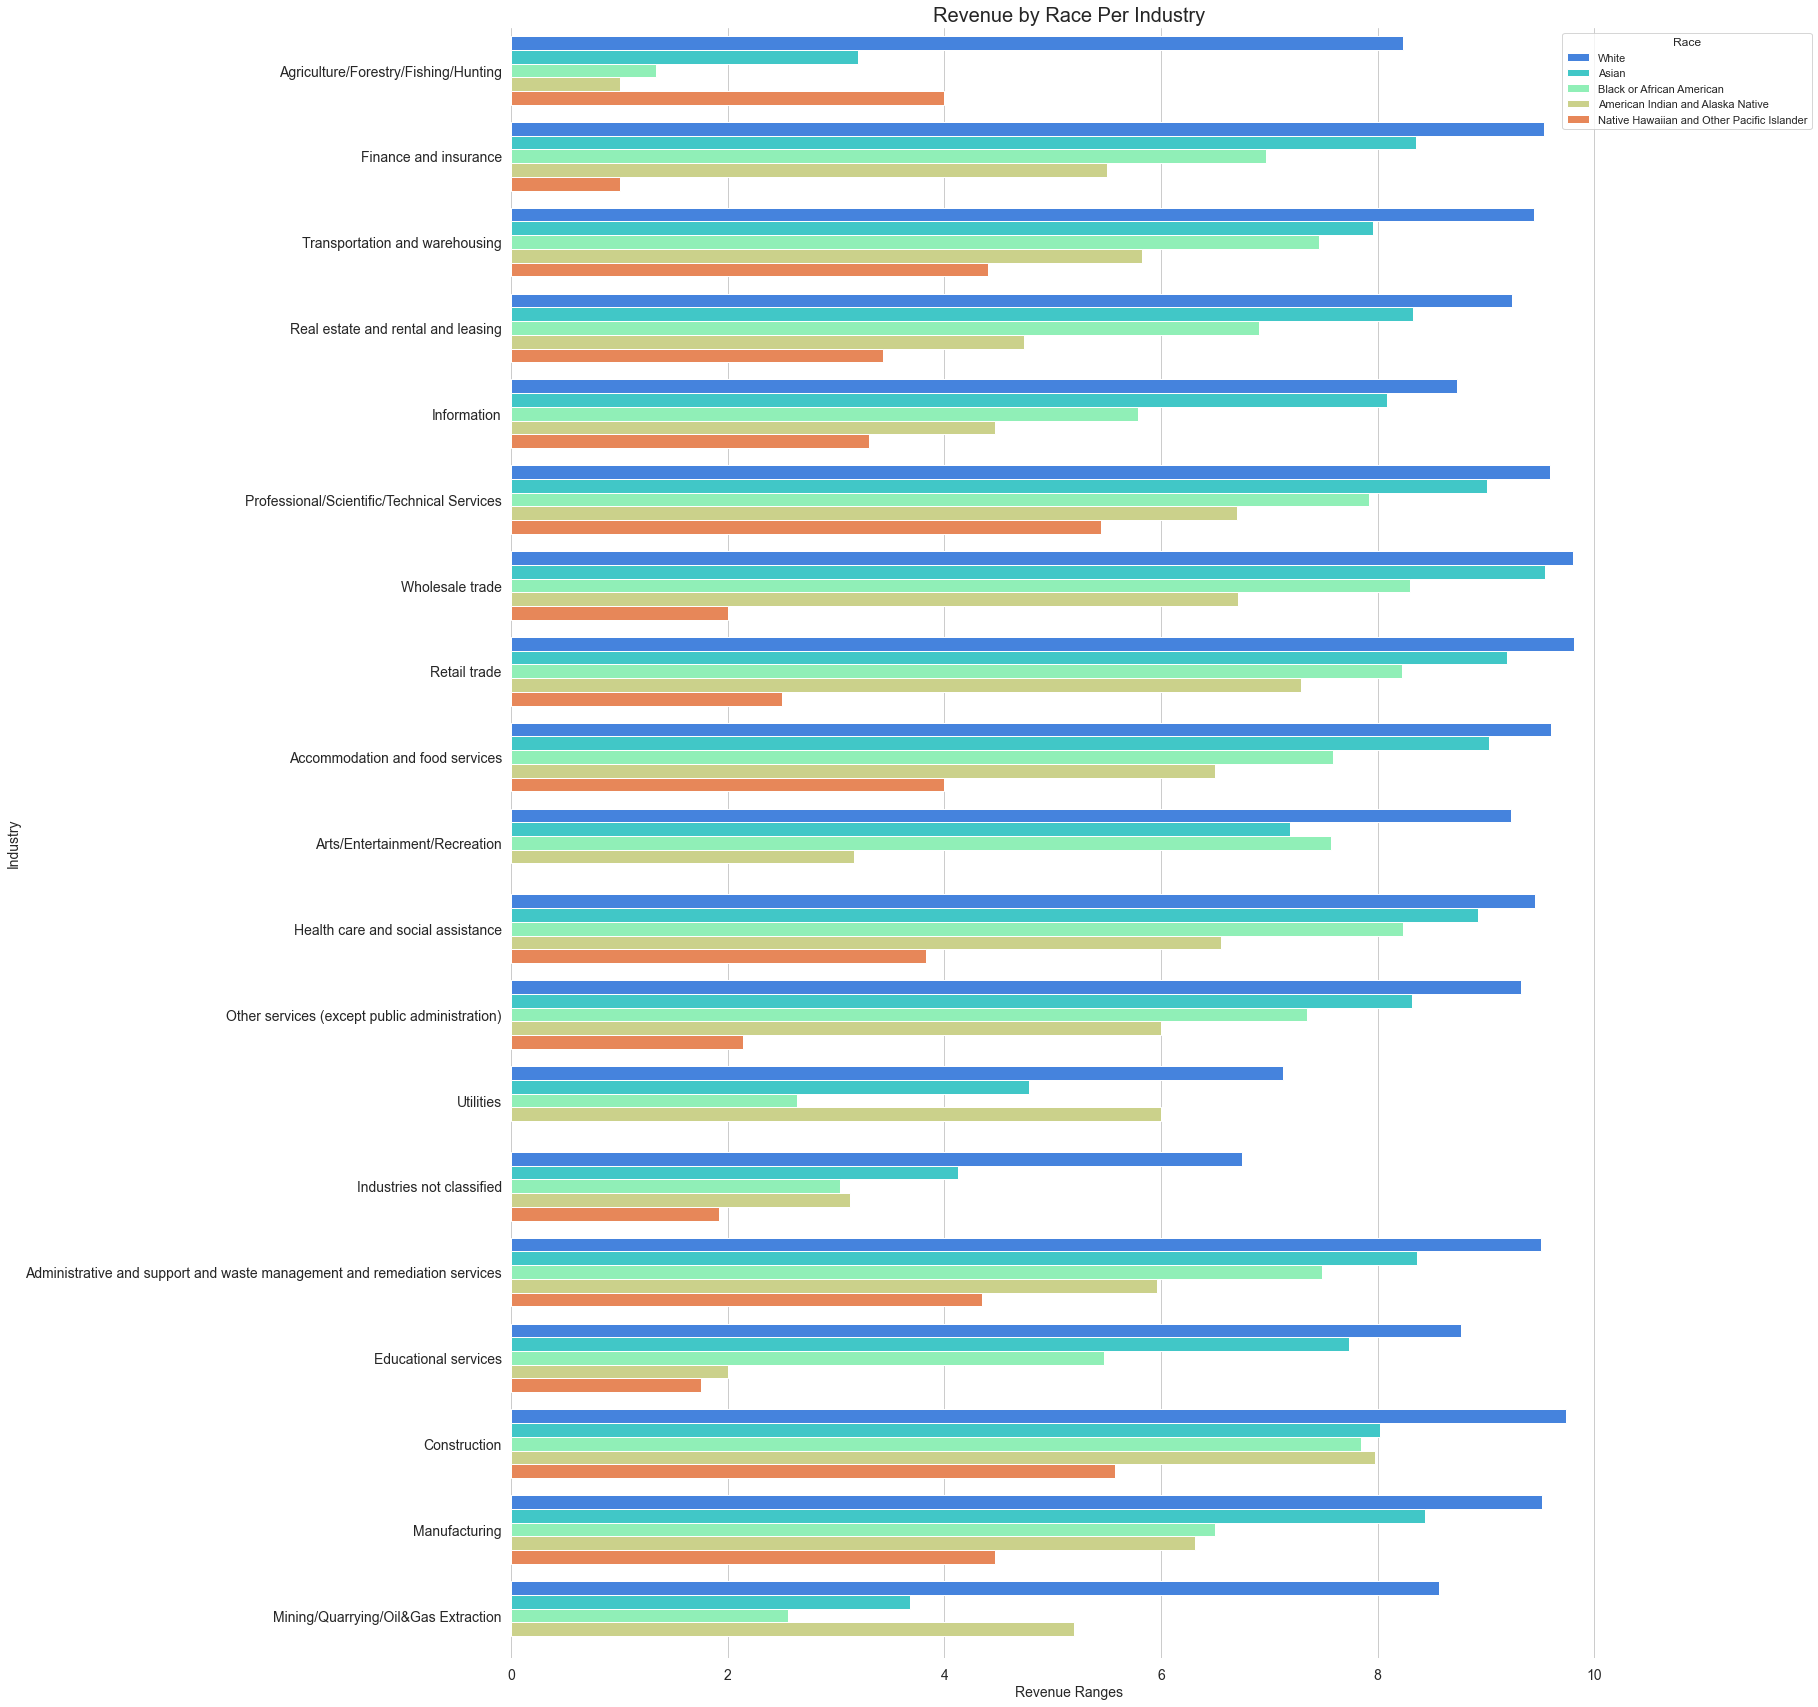

In [24]:
#change revenue range letters to numbers for a numeric range
revenue_industry['revenue_ranges'] = revenue_industry['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# sort industry names by highest revenues to lowest revenues
revenue_industry= revenue_industry.sort_values('revenue_ranges', ascending=False)

sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,30))
ax = sns.barplot(x='revenue_ranges', 
                 y='industry', 
                 data=revenue_industry, 
                 palette='rainbow', 
                 hue='race',
                 ci=None)
plt.legend(bbox_to_anchor=(1.17, 1),loc='upper right', title='Race')
ax.set_title('Revenue by Race Per Industry', size=20)
ax.set_xlabel('Revenue Ranges', size=14)
ax.set_ylabel('Industry', size=14)
sns.despine(left=True, bottom=True)
plt.yticks(size = 14)
plt.xticks(size = 14);

### Age Ranges of Business Owners in the US
#### Topics:
1. Age Ranges of All Business Owners
2. Age Ranges of Business Owners by Sex
3. Age Ranges of Business Owners by Race

When examining the characteristics of business owners dataset, we thought the ages of the owners would be interesting to dive into.
Through analysis we hope to answer:
- How are business owner's ages distributed?
- Within the age groups are there different factors affecting the number of business owners?
- Is there a significant difference in number of business owners depending on sex?
- Is there a significant difference in number of business owners depending on race?

#### Age Ranges of All Business Owners

A simple bar chart is the most effective way to examine the number of business owners by age range. 

In [25]:
# Filtering for all races
age_range = owner_age_gender[owner_age_gender['race_code'] == 0]
# Filter for all industries
age_range = age_range[age_range['industry'] == 'Total for all sectors']
# Filter for all sexes
age_range = age_range[age_range['sex_code'] == 1]
age_range = age_range[['age_group', 'number_of_owners_of_respondent_firms']]


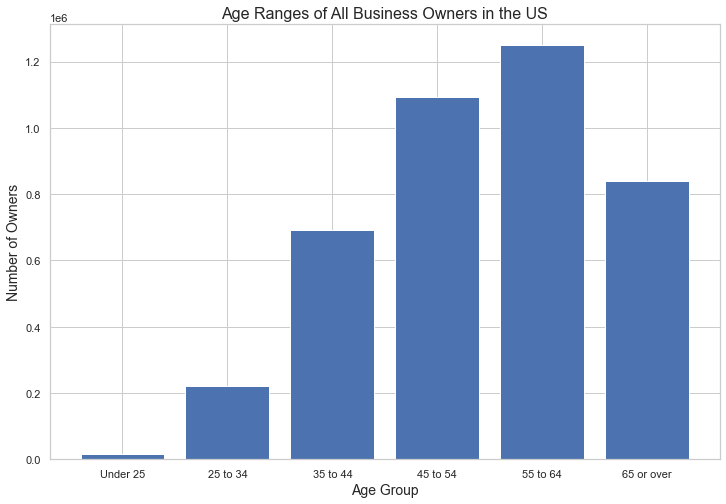

In [26]:
# age range of business owners
plt.figure(figsize=(12,8))
plt.bar(
    age_range['age_group'],
    height= age_range['number_of_owners_of_respondent_firms'])
plt.title('Age Ranges of All Business Owners in the US', size = 16)
plt.xlabel('Age Group', size = 14)
plt.ylabel('Number of Owners', size = 14);

This chart shows the entirety of the data provided for the age of business owners. The following graphs will dive deeper into subcategories of these initial age groupings. As a general statement, it appears the majority of business owners tend to be in higher age ranges.

#### Age Ranges of Business Owners by Sex

Similarly to the chart above, a bar chart with hues for sex is a highly effective way to compare business owners by sex. It is important to note that the data has reduced in size as only data with "Male" or "Female" codes are included in the following chart. 

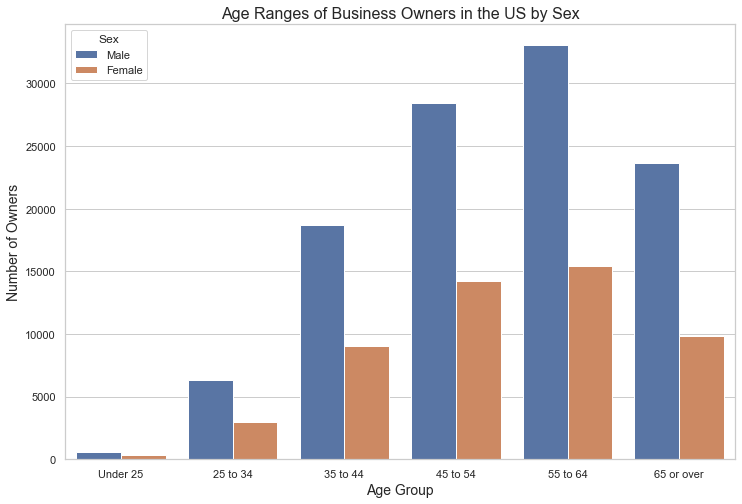

In [27]:
#age range including total of owners of all sexes
owner_age_gender = owner_age_gender[owner_age_gender['sex_code'] != 1]

plt.figure(figsize=(12,8))
sns.barplot(
    x = owner_age_gender['age_group'], 
    y =owner_age_gender['number_of_owners_of_respondent_firms'],
    hue = owner_age_gender['sex'],
    ci=None
    )
plt.legend(
    title = 'Sex',
    loc = 'upper left'
    )
plt.title('Age Ranges of Business Owners in the US by Sex', size = 16)
plt.xlabel('Age Group', size = 14)
plt.ylabel('Number of Owners', size = 14);

This chart shows the age groups of business owners broken down by sex. As a general statement, there appear to be more male business owners across all age groups.

#### Age Ranges of Business Owners by Race

A bar chart with hues for race is a highly effective way to compare business owners by race. It is important to note that data with race codes of minority, nonminority, and all respondent firms are excluded as they are very broad and could lead to duplication of data. Thus, the data is also reduced in size when compared to all business owner data. 

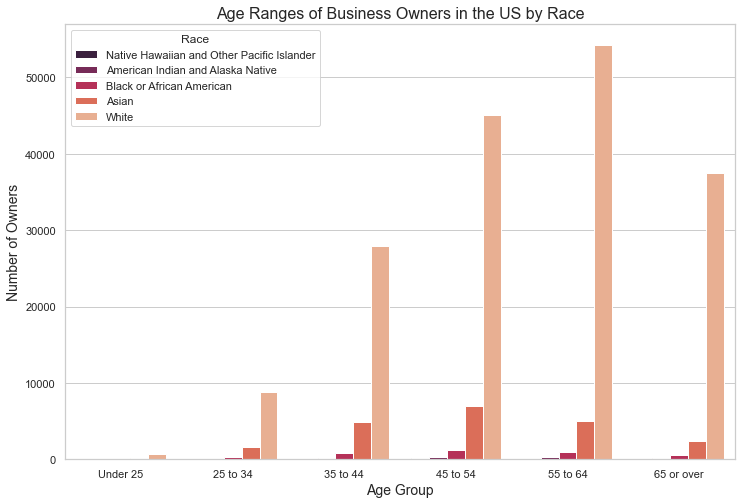

In [28]:
# age range including race
owner_age_gender = owner_age_gender[['industry','sex','sex_code','qdesc','qdesc_label',
'number_of_owners_of_respondent_firms','age_label','age_group','race_code','race']]
# filter to remove the broad categories of minority, nonminority and the total category
owner_age_gender = owner_age_gender[~owner_age_gender['race_code'].isin([0, 90, 92])]


plt.figure(figsize=(12,8))
sns.barplot(
    x = owner_age_gender['age_group'],
    y = owner_age_gender['number_of_owners_of_respondent_firms'],
    hue = owner_age_gender['race'],
    hue_order = ['Native Hawaiian and Other Pacific Islander','American Indian and Alaska Native','Black or African American','Asian','White'],
    palette = 'rocket',
    ci = None
    )
plt.legend(
    title = 'Race', 
    loc = 'upper left'
    )
plt.title('Age Ranges of Business Owners in the US by Race', size = 16)
plt.xlabel('Age Group', size = 14)
plt.ylabel('Number of Owners', size = 14);

This chart shows the breakdown of business owner age groups by race. As a general statement, there appear to be significantly more white business owners than any other race across all age groups. 

## Technology
### Technology Usage by State

The technology dataset offers a myriad of options for exploring the data and asking questions. A couple that we chose to tackle are:
- Are there any major differences in technology usage across states?
- Does the usage of certain types of technology affect:
    - Number of workers
    - Skill levels of workers
    - STEM skills of the workers

First I'll explore tech usage for each state. The five technologies tracked are: 
- Artificial Intelligence
- Cloud Computing/Services
- Specialized Software
- Robotics
- Specialized Equipment

A clustered bar chart across 50 states would be too busy to be an effective visual, so a stacked bar chart will suit our needs while allowing us to see the number of firms using different technologies in each state.

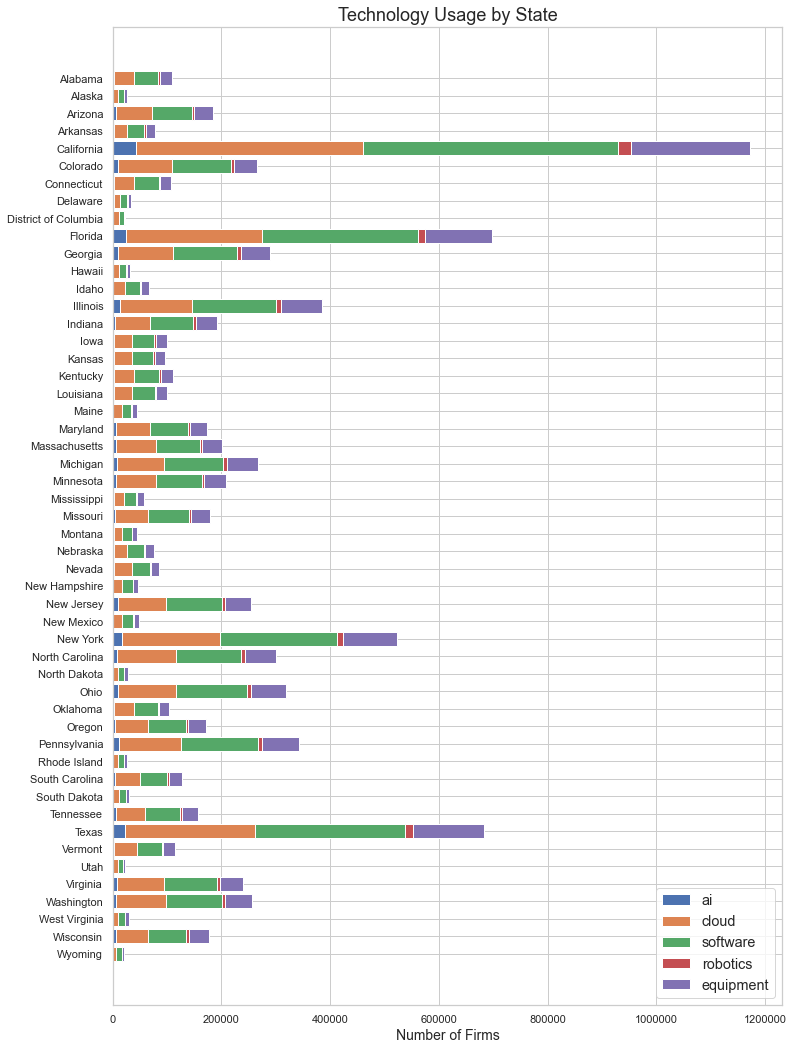

In [29]:
plt.rcParams['figure.figsize'] = [12,18]
bottom = []

for i in usage_by_state.columns:
    b = list(usage_by_state.loc[:, usage_by_state.columns[0]: i].sum(axis=1))
    bottom.append(b)

fig, ax = plt.subplots()

for i, j in enumerate(usage_by_state.columns):
    if i == 0:
        plt.barh(usage_by_state.index, usage_by_state[j])
    else:
        plt.barh(usage_by_state.index, usage_by_state[j], left= bottom[i-1])

#formatting
ax.invert_yaxis()
ax.set_xlabel('Number of Firms', fontsize=14)
plt.legend(labels=usage_by_state.columns, fontsize='large')
plt.title('Technology Usage by State', fontsize=18)
plt.ticklabel_format(style='plain', axis='x')
plt.show();

This ended up being a bit limited in practice as the graph becomes dominated by the larger states such as California, Florida, New York, and Texas. We can still make out that artificial intelligence and robotics are the least used technologies, with cloud and specialized software being the most common, and specialized equipment falling in the middle.
This led us to try normalizing the firm counts in each state to remove the effects of the total number of firms distorting the information.

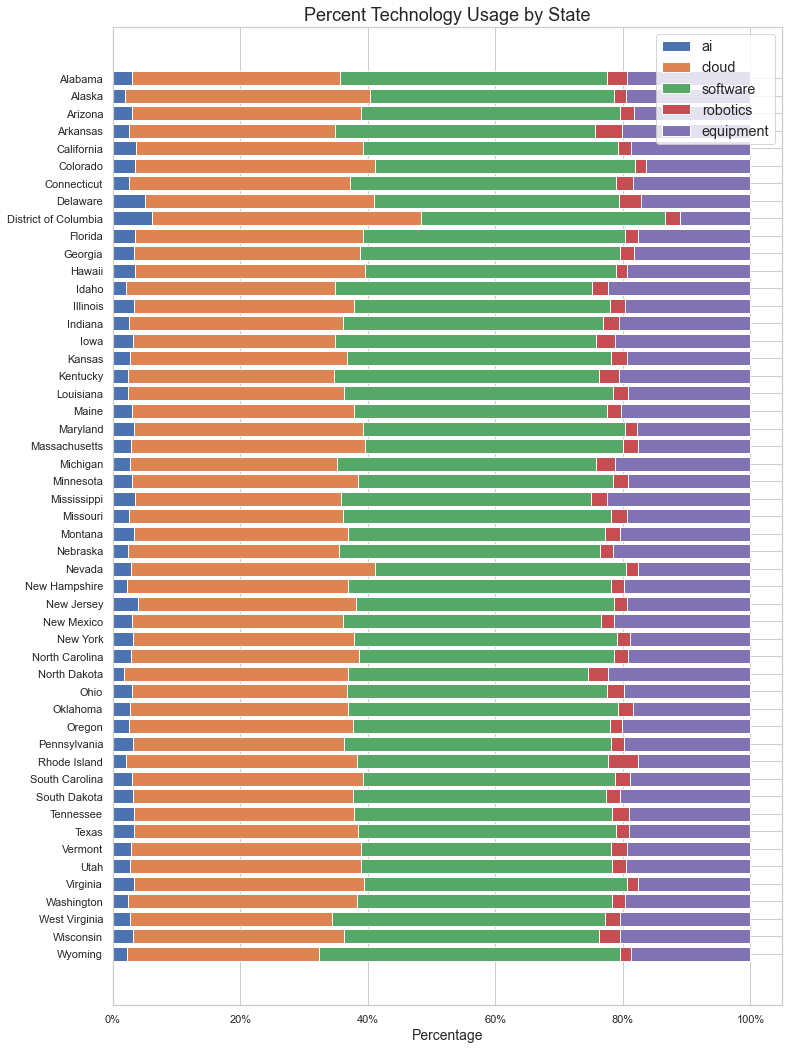

In [30]:
plt.rcParams['figure.figsize'] = [12,18]

usage_100 = usage_by_state.div(usage_by_state.sum(axis=1), axis=0)

bottom = []

for i in usage_100.columns:
    b = list(usage_100.loc[:, usage_100.columns[0]: i].sum(axis=1))
    bottom.append(b)

fig, ax = plt.subplots()

for i, j in enumerate(usage_100.columns):
    if i == 0:
        plt.barh(usage_100.index, usage_100[j])
    else:
        plt.barh(usage_100.index, usage_100[j], left= bottom[i-1])

#formatting
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
ax.invert_yaxis()
ax.set_xlabel('Percentage', fontsize=14)
plt.legend(labels=usage_100.columns, fontsize='large')
plt.title('Percent Technology Usage by State', fontsize=18)
plt.show();


In [31]:
#Top 5 values in each state
for i in usage_100.columns:
    print(pd.DataFrame(usage_100[i].sort_values(ascending=False).nlargest(5)),'\n')

                            ai
state                         
District of Columbia  0.061846
Delaware              0.050527
New Jersey            0.039220
California            0.036437
Mississippi           0.035145 

                         cloud
state                         
District of Columbia  0.421358
Alaska                0.384165
Nevada                0.381804
Colorado              0.377192
Massachusetts         0.368284 

               software
state                  
Wyoming        0.472863
West Virginia  0.427962
Oklahoma       0.423335
Louisiana      0.421806
Missouri       0.419889 

              robotics
state                 
Rhode Island  0.045791
Arkansas      0.043289
Delaware      0.034564
Wisconsin     0.034033
North Dakota  0.031757 

              equipment
state                  
Mississippi    0.224853
Idaho          0.223871
North Dakota   0.223095
Nebraska       0.214727
New Mexico     0.213761 



This proved more insightful as it shows that states that didn't appear to have AI usage in the first graph (like South Carolina for example) actually do! It was interesting to see Washington DC and Delaware leading with the highest percentages of their companies using AI. My initial guess would've been California with it being know for it's big tech industry. Another surprising observation was Wyoming being the highest perecnt for specialized software, since their biggest industries center around oil drilling and gas extraction, which seems like it would place higher in the specialized equipment area.

It would be interesting to look at the technology usage by different industries across the countries, which could certainly have some insights into how far certain technologies have spread and where expansion could be possible.

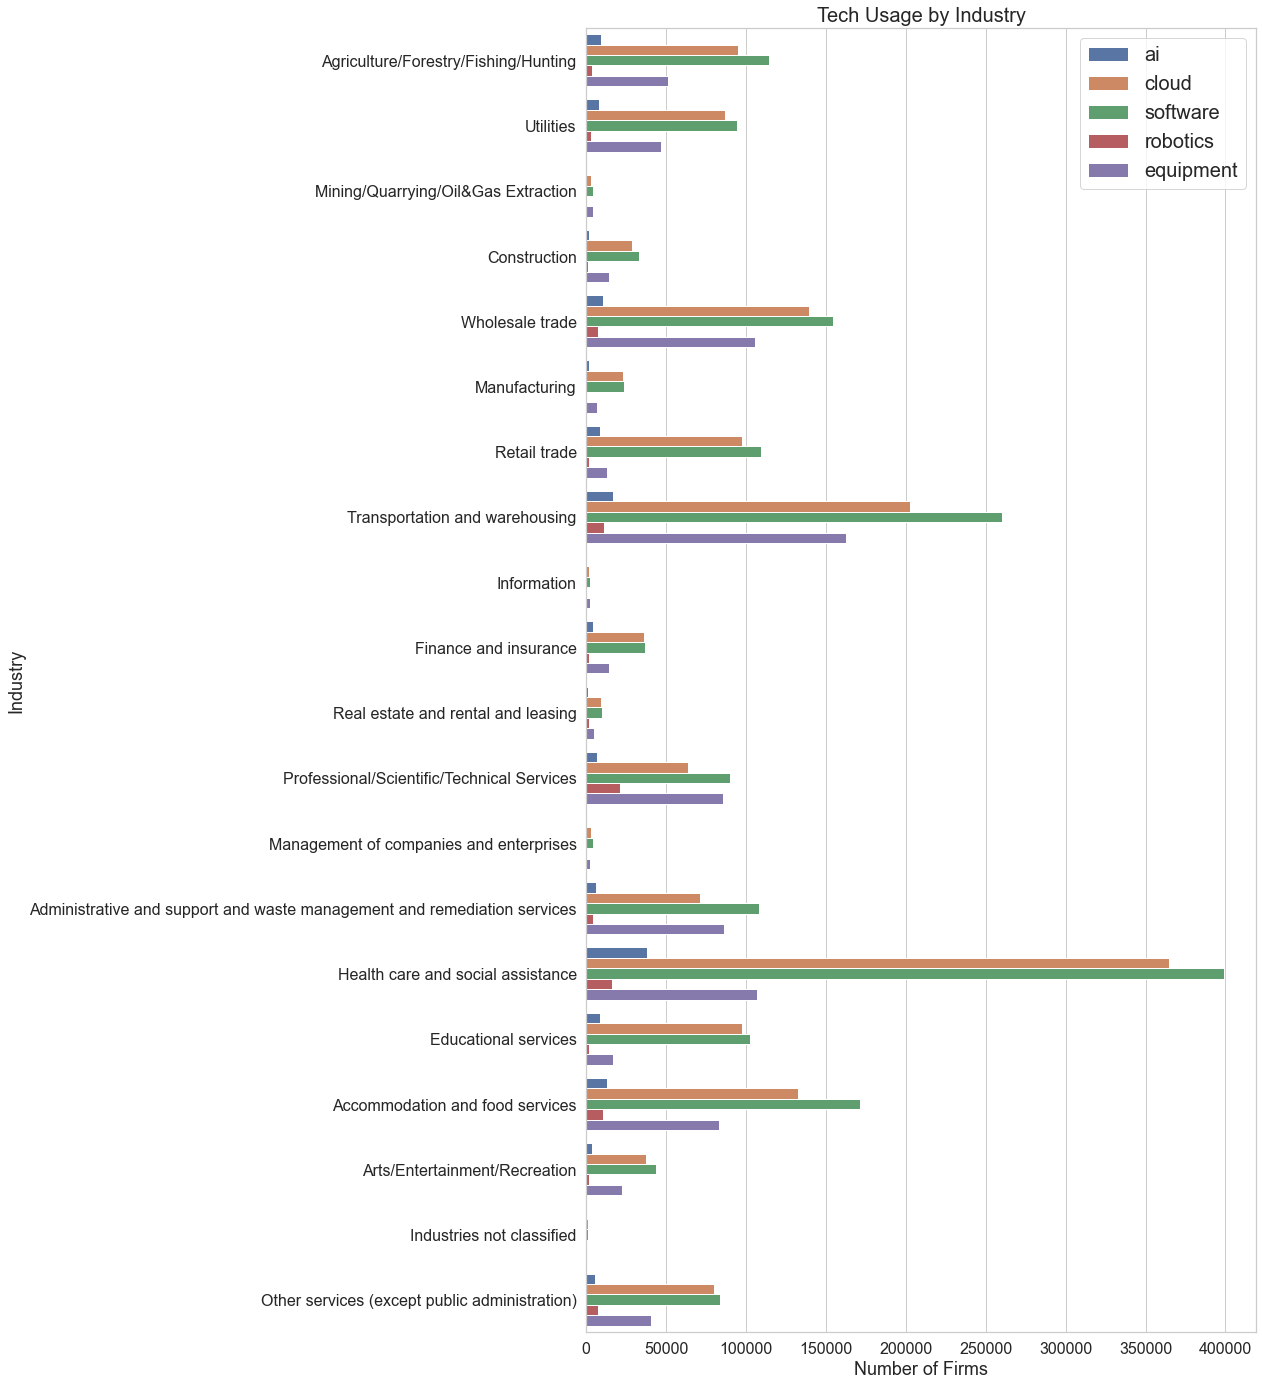

In [32]:
# clustered bar plot tech usage by industry
usage_by_industry = pd.read_csv('CSV/usage_by_industry.csv')
usage_by_industry.set_index('industry', inplace=True)

usage_by_industry = usage_by_industry.stack().to_frame('Number of Firms').reset_index()
usage_by_industry.rename(columns={'level_1':'Technology'}, inplace=True)

plt.figure(figsize=(12,24))
sns.barplot(
    x = 'Number of Firms',
    y = 'industry',
    data = usage_by_industry,
    hue = 'Technology'
);

# formatting
plt.legend(fontsize=20)
plt.xlabel('Number of Firms', fontsize=18)
plt.ylabel('Industry', fontsize=18)
plt.title('Tech Usage by Industry', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16);

Next we will look at the effects of various technologies on workers as a whole. First examining the effect on the number of workers by technology.

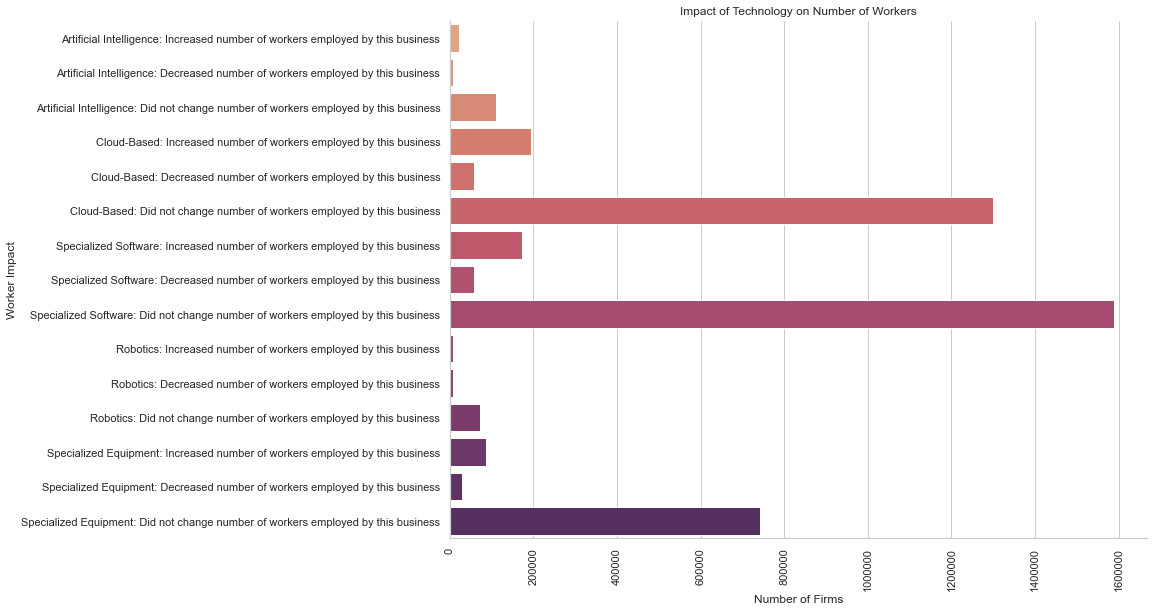

In [33]:
all_industries = worker_impact[worker_impact['naics2017'] == '00']
all_industries = all_industries[[
    'impactwf_u', 'number_of_firms', 'number_of_employees', 'annual_payroll'
    ]]

numb_workers = all_industries[all_industries.index.str.contains('number of workers')]
skill = all_industries[all_industries.index.str.contains('skill level')]
stem = all_industries[all_industries.index.str.contains('STEM')]

sns.catplot(
    y = numb_workers.index,
    x = 'number_of_firms',
    data = numb_workers,
    kind = 'bar',
    palette = 'flare',
    height = 8,
    aspect = 2
    );
plt.title('Impact of Technology on Number of Workers')
plt.xlabel('Number of Firms')
plt.ylabel('Worker Impact')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
plt.show();

The various technologies had a small increase on number of workers in most cases, while occasionally lowering worker counts in some firms, but mostly not having too much of an effect either way. One notable observation is robotics didn't see much of a benefit in terms of number of workers.
We will examine the effects on the skill levels of the workers, both overall and in the STEM categories.

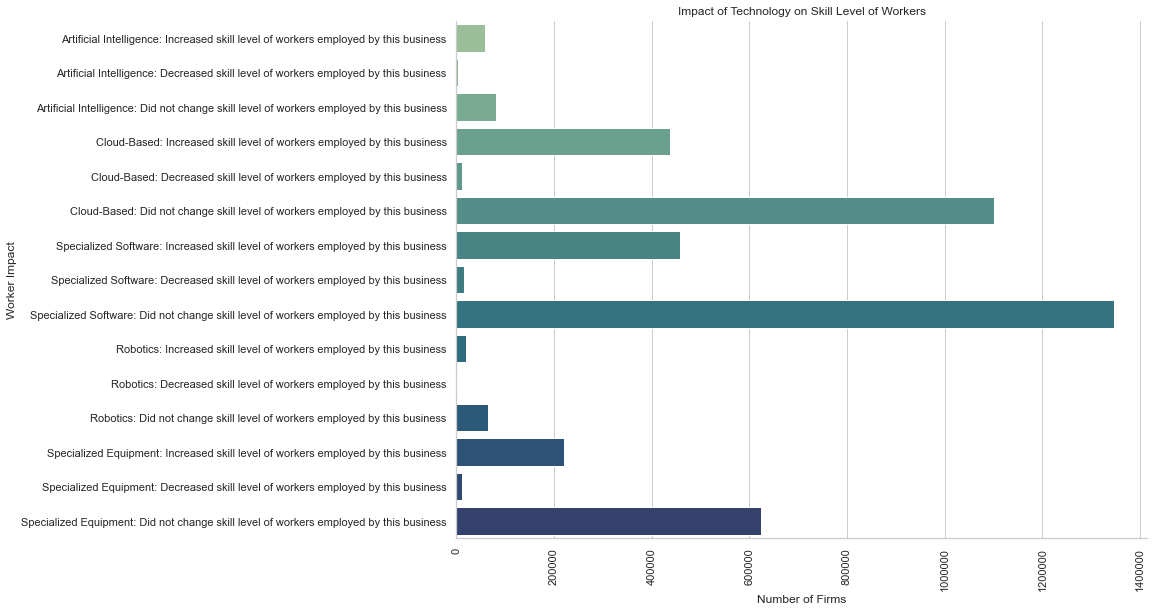

In [34]:
sns.catplot(
    y = skill.index,
    x = 'number_of_firms',
    data = skill,
    kind = 'bar',
    palette = 'crest',
    height = 8,
    aspect = 2
    );

plt.xticks(rotation=90)
plt.xlabel('Number of Firms')
plt.ylabel('Worker Impact')
plt.title('Impact of Technology on Skill Level of Workers')
plt.ticklabel_format(style='plain', axis='x')
plt.show();

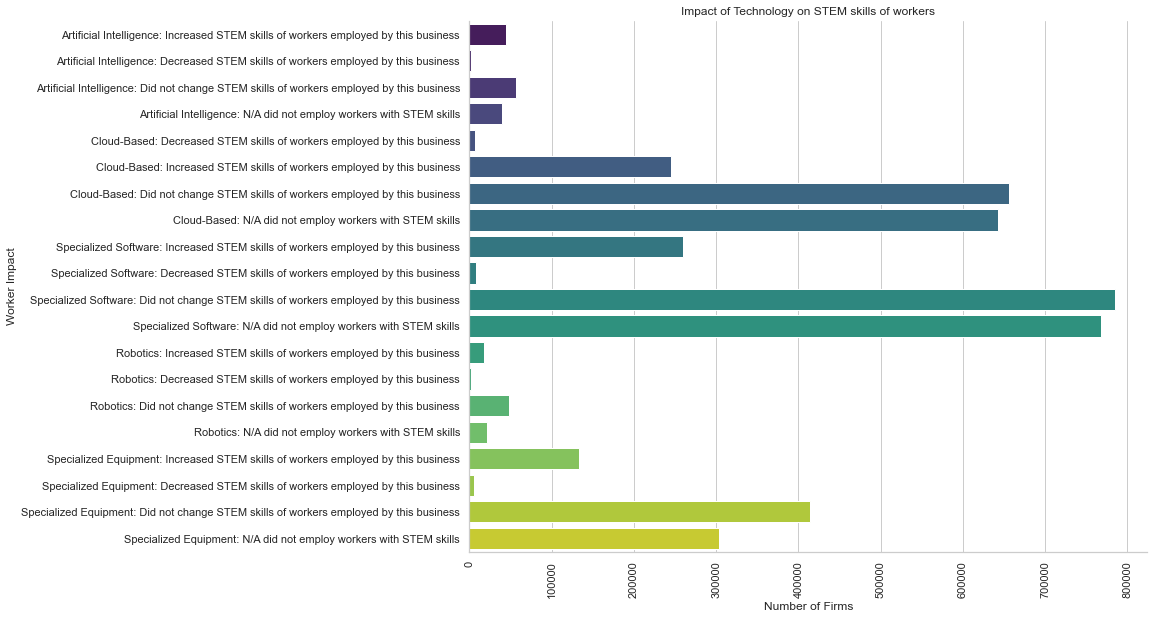

In [35]:
sns.catplot(
    y = stem.index,
    x = 'number_of_firms',
    data = stem,
    kind = 'bar',
    palette = 'viridis',
    height = 8,
    aspect = 2
    );

plt.xticks(rotation=90);
plt.title('Impact of Technology on STEM skills of workers');
plt.xlabel('Number of Firms')
plt.ylabel('Worker Impact')
plt.ticklabel_format(style='plain', axis='x')
plt.show();

The findings here as well as the other thus far will be further eloborated on in the supplementary report.